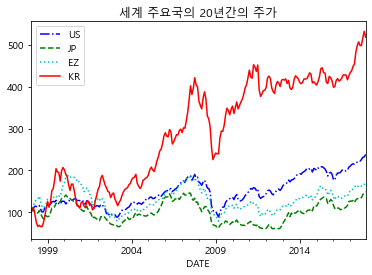

In [54]:
import pandas as pd
pd.core.common.is_list_like = pd.api.types.is_list_like
import pandas_datareader.data as web
import datetime
import matplotlib.pyplot as plt


symbols = [
    "SPASTT01USM661N", # US: 미국
    "SPASTT01JPM661N", # JP: 일본
    "SPASTT01EZM661N", # EZ: 유럽
    "SPASTT01KRM661N", # KR: 한국
]


data = pd.DataFrame()
for sym in symbols:
    
    data[sym] = web.DataReader(sym, data_source='fred', 
                               start=datetime.datetime(1998, 1, 1),
                               end=datetime.datetime(2017, 12, 31))[sym]
data.columns = ["US", "JP", "EZ", "KR"]
data = data / data.iloc[0] * 100

styles = ["b-.", "g--", "c:", "r-"]
data.plot(style=styles)
# plt.rcParams['font.family'] = 'Malgun Gothic'
plt.rcParams['axes.unicode_minus'] = False


plt.title("세계 주요국의 20년간의 주가")
plt.show()

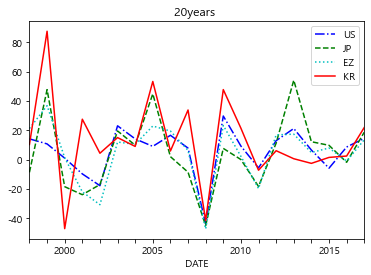

In [55]:
df = ((data.pct_change() + 1).resample("A").prod() - 1).T * 100

df.T.plot(style=styles)
plt.title('20years ')
plt.xticks(df.columns)
plt.show()

In [56]:
from sklearn.decomposition import PCA
pca = PCA(n_components=1)
w = pca.fit_transform(df)

In [57]:
m = pca.mean_
m

array([  9.35024903,  45.7748003 , -15.71779759,  -6.91967355,
       -15.20108361,  17.48765584,  10.95568389,  32.60609686,
        11.08048721,   9.94632162, -44.28095456,  27.19782058,
         8.32897696, -12.63319273,  11.86532327,  23.41445161,
         5.34108071,   3.42888451,   2.14468408,  17.2613721 ])

In [58]:
p1 = pca.components_[0]
p1

array([-0.00270658,  0.53651512, -0.39468113,  0.41148841,  0.23991661,
       -0.0315062 , -0.02577946,  0.27841406, -0.07254126,  0.28104992,
        0.03493189,  0.23635416,  0.15424312,  0.05797757, -0.0706337 ,
       -0.2543979 , -0.09127243, -0.01132363, -0.00264183,  0.06046709])

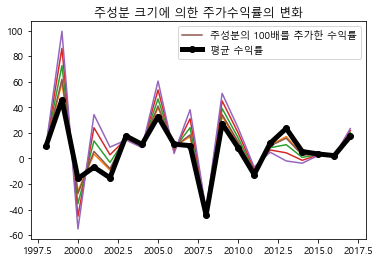

In [74]:
import numpy as np
xrange = np.linspace(1998, 2017, 20, dtype=int)
for i in np.linspace(0, 100, 5):
    plt.plot(xrange, pca.mean_ + p1 * i)
plt.plot(xrange, pca.mean_ + p1 * 30, label="주성분의 100배를 추가한 수익률")
plt.plot(xrange, pca.mean_, "ko-", lw=5, label="평균 수익률")
plt.title("주성분 크기에 의한 주가수익률의 변화")
plt.legend()
plt.show()

In [65]:
df_w = pd.DataFrame(w)

df_w.index = df.index
df_w.columns = ['주성분 비중']
df_w

,주성분 비중
US,-33.413784
JP,-20.943197
EZ,-26.917702
KR,81.274683


[[-33.4137842 ]
 [-20.94319729]
 [-26.91770195]
 [ 81.27468344]]


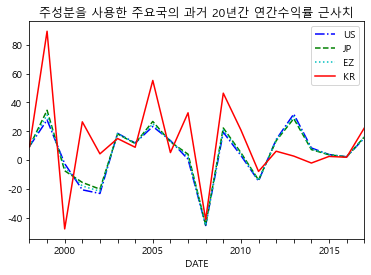

In [72]:
print(w)
df_i = pd.DataFrame(pca.inverse_transform(w))
df_i.index = df.index
df_i.columns = df.columns
df_i.iloc[:, -10:]
df_i.T.plot(style=styles)
plt.title("주성분을 사용한 주요국의 과거 20년간 연간수익률 근사치")
plt.xticks(df.columns)
plt.show()